In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 44s 0us/step


In [ ]:
# data_dir="C:\Users\Ashutosh Thakur\Desktop\jupyter-2\datasets\flower_photos"

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

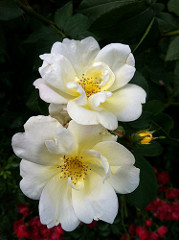

In [9]:
PIL.Image.open(str(roses[0]))

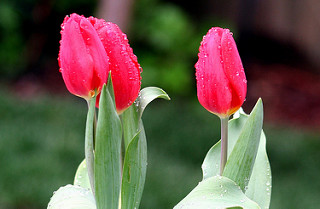

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [19]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [20]:
flowers_images_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [21]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [22]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [23]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [28]:
X = np.array(X)
y = np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [32]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)  

Epoch 1/20
86/86 [==============================] - 31s 348ms/step - loss: 1.3445 - accuracy: 0.4342
Epoch 2/20
86/86 [==============================] - 27s 317ms/step - loss: 1.0030 - accuracy: 0.5854
Epoch 3/20
86/86 [==============================] - 28s 330ms/step - loss: 0.8343 - accuracy: 0.6704
Epoch 4/20
86/86 [==============================] - 28s 327ms/step - loss: 0.6494 - accuracy: 0.7540
Epoch 5/20
86/86 [==============================] - 28s 323ms/step - loss: 0.4748 - accuracy: 0.8259
Epoch 6/20
86/86 [==============================] - 28s 323ms/step - loss: 0.2515 - accuracy: 0.9164
Epoch 7/20
86/86 [==============================] - 28s 323ms/step - loss: 0.1582 - accuracy: 0.9484
Epoch 8/20
86/86 [==============================] - 28s 327ms/step - loss: 0.0935 - accuracy: 0.9727
Epoch 9/20
86/86 [==============================] - 28s 324ms/step - loss: 0.0831 - accuracy: 0.9753
Epoch 10/20
86/86 [==============================] - 28s 326ms/step - loss: 0.0421 - accura

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 70ms/step - loss: 2.6992 - accuracy: 0.6558


[2.6991710662841797, 0.655773401260376]

In [34]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 2s 64ms/step


array([[  7.5407667 ,  17.033468  ,  -6.2458096 , -22.225922  ,
        -23.04255   ],
       [  5.9963007 ,  -1.2979076 ,  -8.587639  ,  -8.552644  ,
         -1.4311912 ],
       [ -1.9854075 ,  -2.88615   ,  17.873568  , -15.205731  ,
         -5.2030096 ],
       ...,
       [  1.3642621 , -18.959412  , -13.989817  ,   7.5642095 ,
         -1.7986469 ],
       [  3.6722293 ,  -3.6413443 ,  -5.2145915 ,  -7.607326  ,
          2.3483872 ],
       [  0.39328894, -19.684278  ,  -4.25231   ,   5.7565565 ,
          1.4848765 ]], dtype=float32)

In [35]:
score = tf.nn.softmax(predictions[0])

In [36]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.5394441e-05, 9.9992454e-01, 7.7607795e-11, 8.9090214e-18,
       3.9370708e-18], dtype=float32)>

In [37]:
np.argmax(score)

1

In [38]:
y_test[0]

1

In [40]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

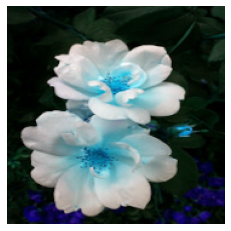

In [41]:
plt.axis('off')
plt.imshow(X[0])

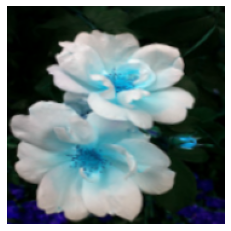

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [47]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=15)   

Epoch 1/15
86/86 [==============================] - 58s 591ms/step - loss: 1.3534 - accuracy: 0.4190
Epoch 2/15
86/86 [==============================] - 52s 608ms/step - loss: 1.1125 - accuracy: 0.5432
Epoch 3/15
86/86 [==============================] - 51s 599ms/step - loss: 1.0109 - accuracy: 0.6032
Epoch 4/15
86/86 [==============================] - 50s 577ms/step - loss: 0.9352 - accuracy: 0.6225
Epoch 5/15
86/86 [==============================] - 47s 544ms/step - loss: 0.8944 - accuracy: 0.6555
Epoch 6/15
86/86 [==============================] - 48s 555ms/step - loss: 0.8180 - accuracy: 0.6860
Epoch 7/15
86/86 [==============================] - 47s 549ms/step - loss: 0.7878 - accuracy: 0.7028
Epoch 8/15
86/86 [==============================] - 47s 549ms/step - loss: 0.7229 - accuracy: 0.7235
Epoch 9/15
86/86 [==============================] - 46s 541ms/step - loss: 0.6898 - accuracy: 0.7391
Epoch 10/15
86/86 [==============================] - 47s 542ms/step - loss: 0.6701 - accura

In [48]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 3s 91ms/step - loss: 0.9012 - accuracy: 0.7092


[0.9012377858161926, 0.7091503143310547]